REPEAT AT =  178
0.0069079471880266734
0.5647774483821237
6.223959074844116
2.6060752592246286
2.319169691364742
1.4278236657374668
1.5515372932144975
1.0072574870905924
1.4765023258423722
0.4914416557146448
1.2095032471784426
6.423950836193768
0.6255038237320192
0.36243786065024386
2.2887782255035853
0.09044993085264966
0.7677751225157678
8.346705297874763
1.341675127069188
0.14662550334641006
2.5839875214005423
1.0811884342217586
3.590991571768532
1.2460918208622358
2.0347757041985837
8.209349026871726
0.46365227954579413
4.042375012004078
2.1321010194226035
0.5017077581277414
2.4055397924498587
1.3468406601603764
0.42192698940739815
5.5526182011616845
0.7396203873618175
1.4657250444935133
14.098442596378
1.137638210892296
3.3625736928462886
2.4108957412056515
1.6706086868021928
0.07134158599621017
4.325421213150447
0.9159092436275502
3.9324476998319557
4.601600176761079
5.2118138518319554
4.85392273036916
0.4170966260866721
3.9615198617456624
11.575446715500348
1.608430295250842
0.4

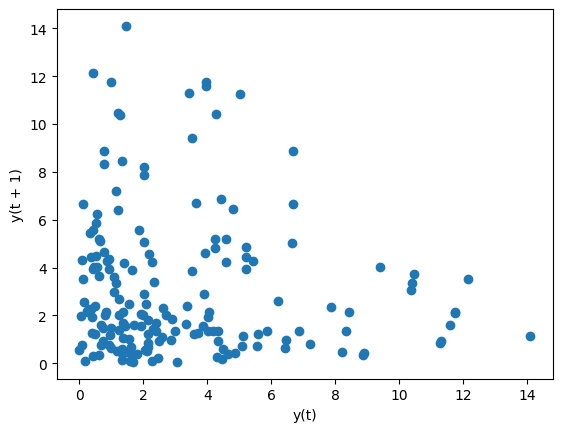

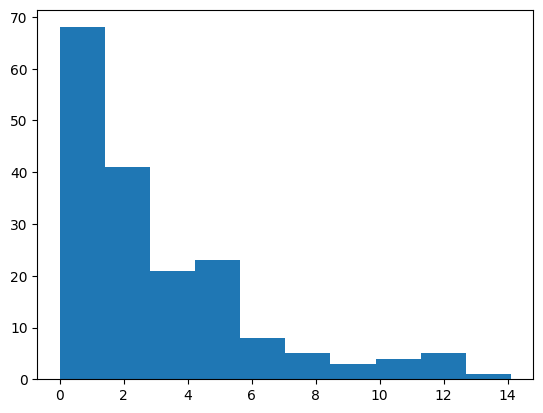

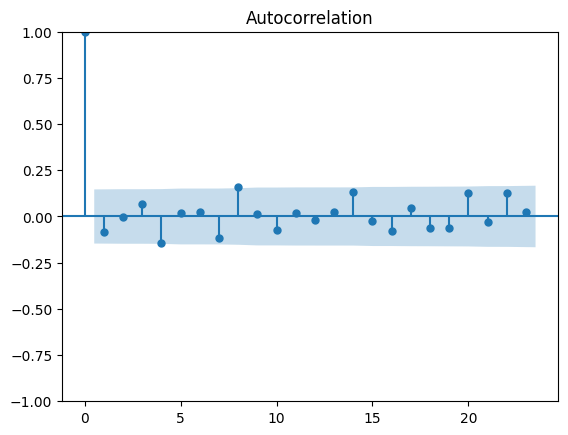

In [9]:
import numpy as np
import pandas as pd
import matplotlib
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

def linearCongruentialMethod(seed, m, a, c, randomNums, noOfRandomNums):
    already_seen = [-1] * (noOfRandomNums)
    temp = ((seed * a) + c) % m
    randomNums.append(round(temp / m, precision))
    for i in range(1, noOfRandomNums):
        temp = ((temp * a) + c) % m
        randomNums.append(round(temp / m, precision))
        if randomNums[i] not in already_seen:
            already_seen[i] = randomNums[i]
        else:
            print("REPEAT AT = ", i)
            break
    pass

def inversTransformation(randomNums):
    b = 3
    for i in range(0, len(randomNums), 1):
        x = -b * np.log(1 - randomNums[i])
        randomVariate.append(x)
        print(x)
    pass



seed = 1
m = 2**16 + 1    # Modulus parameter
a = 75        # Multiplier term
c = 74        # Increment term
precision = 4
noOfRandomNums = 10**4
randomNums = []
randomVariate = []
list(randomNums)
linearCongruentialMethod(seed, m, a, c, randomNums, noOfRandomNums)
for i in range(0, randomNums.__len__(), 1):
    # print(randomNums[i])
    pass
inversTransformation(randomNums)

data_lcg = pd.DataFrame(randomVariate)
data_lcg.to_csv("data_lcg_1.csv")
pd.plotting.lag_plot(data_lcg)      # ScatterPlot
plt.show()
plt.hist(data_lcg)                  # Histogram
plot_acf(data_lcg)                  # AutoCorrelation
plt.show()


In [42]:
import numpy as np
import random


x = 0.123456789
print(x)
x = np.array(x)
np.resize(x, (1, 4))
print(x)
for i in range(0, 10*4):
    # print(random.random())
    pass

0.123456789
0.123456789
